In [266]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import color_sequences as cs
import glob
from pathlib import Path

YEAR = '2015'

if not Path(f'figures\\{YEAR}').exists():
    Path(f'figures\\{YEAR}').mkdir(parents=True)
if Path(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png').exists():
    if input(f'DATA ALREADY EXISTS FOR {YEAR}!! CONTINUE ANYWAY?').lower() == 'no':
        raise RuntimeError()

In [267]:
paths = glob.glob(f'data\\{YEAR}\\*.csv')
print(len(paths))
data = pd.concat((pd.read_csv(f) for f in paths), ignore_index=True)
data.info()

12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          614 non-null    object 
 1   Authors                 502 non-null    object 
 2   Author Affiliations     502 non-null    object 
 3   Publication Title       614 non-null    object 
 4   Date Added To Xplore    614 non-null    object 
 5   Publication Year        614 non-null    int64  
 6   Volume                  614 non-null    int64  
 7   Issue                   614 non-null    int64  
 8   Start Page              614 non-null    object 
 9   End Page                614 non-null    object 
 10  Abstract                614 non-null    object 
 11  ISSN                    614 non-null    object 
 12  ISBNs                   0 non-null      float64
 13  DOI                     614 non-null    object 
 14  Funding Information     198 non-null   

In [268]:
data.dropna(how='all', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          614 non-null    object 
 1   Authors                 502 non-null    object 
 2   Author Affiliations     502 non-null    object 
 3   Publication Title       614 non-null    object 
 4   Date Added To Xplore    614 non-null    object 
 5   Publication Year        614 non-null    int64  
 6   Volume                  614 non-null    int64  
 7   Issue                   614 non-null    int64  
 8   Start Page              614 non-null    object 
 9   End Page                614 non-null    object 
 10  Abstract                614 non-null    object 
 11  ISSN                    614 non-null    object 
 12  DOI                     614 non-null    object 
 13  Funding Information     198 non-null    object 
 14  PDF Link                614 non-null    ob

In [269]:
data = data[['Authors', 'Author Affiliations', 'Publication Year', 'Funding Information', 'Author Keywords', 'IEEE Terms']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              502 non-null    object
 1   Author Affiliations  502 non-null    object
 2   Publication Year     614 non-null    int64 
 3   Funding Information  198 non-null    object
 4   Author Keywords      492 non-null    object
 5   IEEE Terms           501 non-null    object
dtypes: int64(1), object(5)
memory usage: 28.9+ KB


In [270]:
data.dropna(subset=['Authors', 'Author Affiliations'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              502 non-null    object
 1   Author Affiliations  502 non-null    object
 2   Publication Year     502 non-null    int64 
 3   Funding Information  198 non-null    object
 4   Author Keywords      492 non-null    object
 5   IEEE Terms           500 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.7+ KB


In [271]:
data.to_csv(f'agg_data\\{YEAR}.csv', encoding='utf-8', index=False)
data.head(5)

,Authors,Author Affiliations,Publication Year,Funding Information,Author Keywords,IEEE Terms
0,P. Willett,University of Connecticut,2015,NaN,NaN,NaN
1,W. Yao; Z. Li,"Signal Processing Department, Institute for In...",2015,NaN,Color blending;color correction;mobile panoram...,Image color analysis;Imaging;Image sequences;M...
2,J. Liu; H. Li; B. Himed,Department of Electrical and Computer Engineer...,2015,Air Force Research Laboratory(grant numbers:FA...,Adaptive coherence estimator;adaptive detectio...,Approximation methods;Accuracy;Noise;Covarianc...
3,R. Yu; E. A. Ince; A. Hocanin,Department of Electrical and Electronic Engine...,2015,NaN,Generalized Kullback-Leibler divergence;multip...,Frequency estimation;Vectors;Estimation;Signal...
4,C. -C. Su; L. K. Cormack; A. C. Bovik,Department of Electrical and Computer Engineer...,2015,National Science Foundation(grant numbers:IIS-...,Bivariate model;closed-form;natural scene stat...,Correlation;Joints;Hidden Markov models;Histog...


In [ ]:
countries = []

# with open('auth_aff.txt', 'w', encoding='utf-8') as f:
largest = [0, 0]
for i in range(data.shape[0]):
    authors = data['Authors'][i].split('; ')
    affiliations = data['Author Affiliations'][i].split('; ')
    largest = [max([largest[0], len(authors)]), i if largest[0] < len(authors) else largest[1]]
    if len(authors) != len(affiliations):
        print(i)
        print(authors, affiliations, sep='\n')
        print(len(authors), len(affiliations))
    for author, aff in zip(authors, affiliations, strict=True):
        # f.write(f'{author}: {aff}\n')
        if aff == 'NA':
            # pass
            print(author)
        if aff.split(', ')[-1] in ('Georgia', 'IN'):
            print(f'{author}: {aff}')
        countries.append(aff.split(', ')[-1])

S. Timotheou: KIOS Research Center for Intelligent Systems and Networks, University of Cyprus, Nicosia
I. Krikidis: KIOS Research Center for Intelligent Systems and Networks, University of Cyprus, Nicosia


In [ ]:
replacement = {
    'South Korea': ('Republic of Korea', 'Korea', 'KR', 'Korea University of Technology and Education'),
    'UAE': ('United Arab Emirates',),
    'Turkey': ('Türkiye', 'Türkey', 'TR', 'TURKEY'),
    'Hong Kong': ('Hong Kong SAR', 'Hong Kong SAR China', 'HK', 'Hong Kong.', 'Hong kong'),
    'The Netherlands': ('Netherlands', 'The Netherland', 'NL', 'the Netherlands'),
    'SAR China': ('SAR', 'S.A.R.'),
    'U.K.': ('U.K', 'UK', 'United Kingdom', 'WC1E 6BT', 'GB', 'U. K.'),
    'China': ('China,', "People's Republic of China", 'P. R. China', 'P.R. China', 'China.', 'Fuzhou', 'Shanxi', 'CN', 'Xi’an', 'Beijing', 'Chongqing University',
              'Ministry of Industry and Information Technology', '210094 China', 'Army Artillery and Air Defense Academy of PLA', 'Hubei Key Laboratory of Optical Information',
              'Chengdu', 'P.R.China', 'Southeast University', ),
    'Czech Republic': ('the Czech Republic', 'Czechia', 'Czech republic'),
    'USA': ('USA.', 'NC', 'NM', 'WI', 'CA', 'VA', 'United States', 'Princeton University', 'Zipreel Inc.', 'Berkeley', 'Massachusetts Institute of Technology', 'US', 'TX USA',
            'Pennsylvania', 'Corvallis', 'University of Connecticut', 'The Mind Research Network', 'U.S.A.', 'Ohio', 'MA', 'LA', 'NY', 'NJ', 'OH', 'Inc.', 'RI', 'AZ', 'MI',
            'GA', 'USAE', 'Durham', ),
    'Italy': ('Italy.', 'IT',),
    'Macau': ('Macao',),
    'Singapore': ('Nanyang Technological University', 'SG', '138632', '119077', '639798',),
    'Canada': ('Irdeto Canada', 'ON',),
    'Taiwan': ('ROC', 'R.O.C', 'R.O.C.', 'Taiwan 320', 'TW', 'R. O. C.', 'Taiwan R. O. C.',),
    'Lebanon': ('Louaize',),
    'Ireland': ('Antenna High Frequency Research Centre', 'IE',),
    'Spain': ('Universidad de Oviedo', 'ES', 'Computer Vision Center'),
    'Belgium': ('Louvain-la-Neuve', 'BE'),
    'Australia': ('AU', 'Western Australia'),
    'Serbia': ('RS',),
    'India': ('IN', 'Karnataka', 'Kanpur',),
    'South Africa': ('ZA',),
    'Thailand': ('TH',),
    'France': ('FR', 'Marseille', ),
    'Finland': ('FI','Findland'),
    'Japan': ('JP',),
    'Iran': ('IR',),
    'Germany': ('DE',),
    'Denmark': ('DK',),
    'Ivory Coast': ('Cäte d’Ivoire',),
    'Israel': ('Beersheba', 'Haifa', 'Jerusalem', 'Israe',),
    'Russia': ('Russian Federation',),
    'Qatar': ('QATAR'),
    'Brazil': ('BR',),
    'Independent': ('Unaffiliated/independent and Thales Netherlands (retired) Research Scientist',),
    'Saudi Arabia': ('SA', 'Kingdom of Saudi Arabia', 'Makkah Province',),
    'Sweden': ('SE',),
    'Portugal': ('ISTAR-IUL Lab',),
    'Vietnam': ('Viet nam',),
    'Macedonia': ('Republic of Macedonia',),
    'Cyprus': ('Nicosia',),
    'Croatia': ('HR',),
}

In [274]:
countries = pd.Series(countries, dtype=str)
countries = countries.replace({alias: actual for actual, aliases in replacement.items() for alias in aliases})
print(countries.info())
countries = countries[countries != 'NA']
print(countries.info())
counts = countries.value_counts()
# counts = counts[counts >= 10]
print(counts)
labels = list(counts.keys())
values = list(counts.values)
counts.to_csv('look.csv')

<class 'pandas.core.series.Series'>
RangeIndex: 1559 entries, 0 to 1558
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
1559 non-null   object
dtypes: object(1)
memory usage: 12.3+ KB
None
<class 'pandas.core.series.Series'>
Index: 1559 entries, 0 to 1558
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
1559 non-null   object
dtypes: object(1)
memory usage: 24.4+ KB
None
China              537
USA                229
South Korea         76
France              75
India               54
Italy               53
U.K.                52
Canada              45
Singapore           39
Australia           37
Taiwan              33
Germany             28
Brazil              28
Turkey              26
Sweden              22
Japan               21
Hong Kong           20
Israel              18
Finland             17
Iran                14
Switzerland         13
Austria             12
Spain               12
Saudi Arabia        10
Portugal             8
The Netherlands     

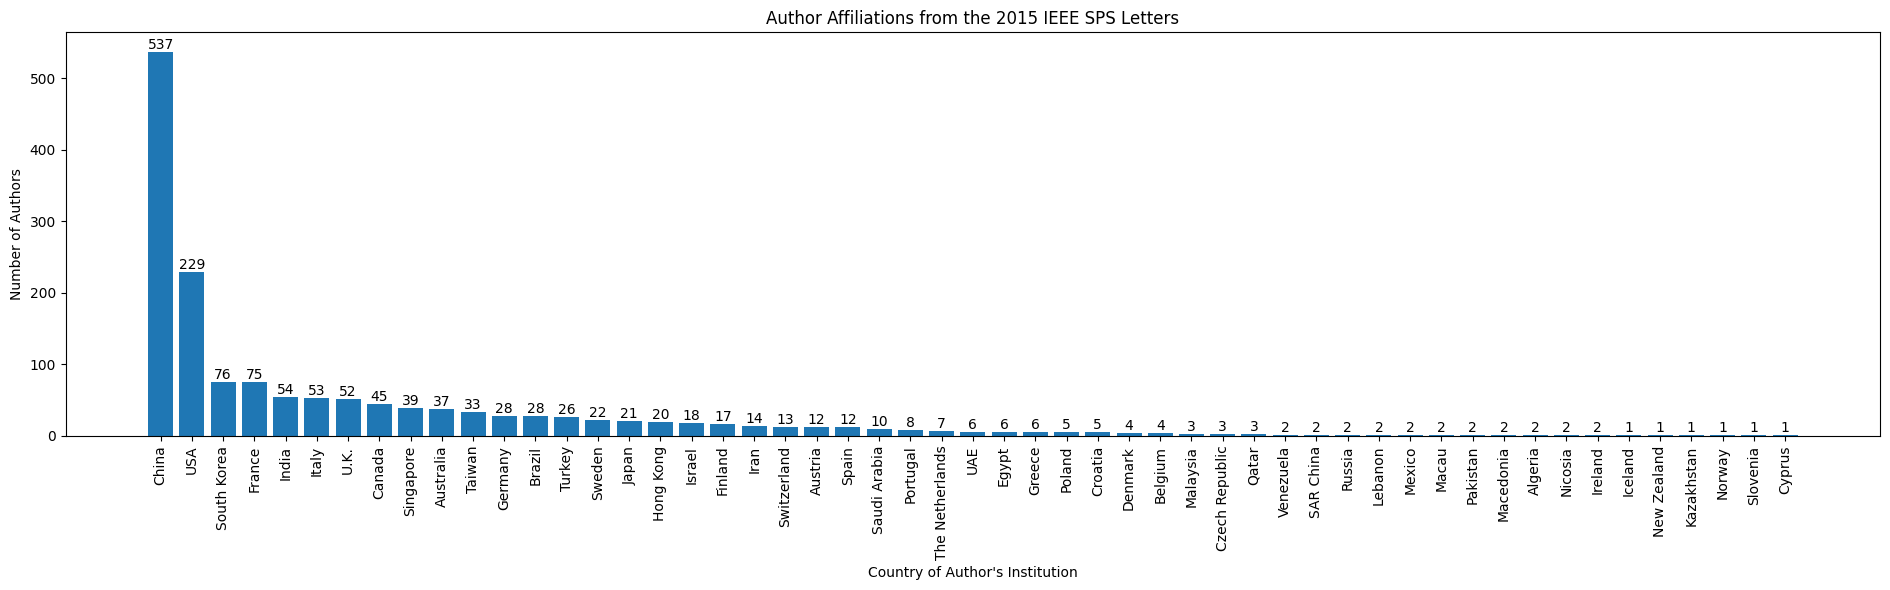

In [275]:
fig, ax = plt.subplots(figsize=(19, 6))
bar_cont = ax.bar(labels, values)
# ax.set(ylim=(0, 1999))
plt.xlabel('Country of Author\'s Institution')
plt.ylabel('Number of Authors')
plt.title(f'Author Affiliations from the {YEAR} IEEE SPS Letters')
plt.xticks(rotation=90)
ax.bar_label(bar_cont)
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_by_country.png', bbox_inches='tight')
plt.show()

In [276]:
super_counts = counts.nlargest()
full = counts.sum()
filtered = super_counts.sum()

super_counts['All Other Countries'] = full - filtered

labels = list(super_counts.keys())
values = list(super_counts.values)


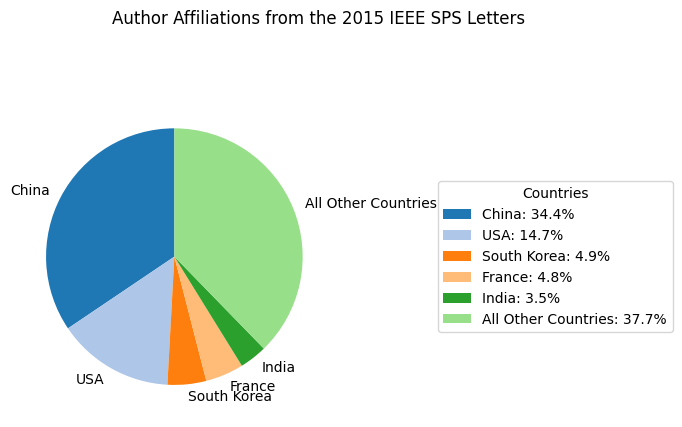

In [277]:

fig, ax = plt.subplots()
wedges, texts = ax.pie(values, labels=labels, startangle=90, colors=cs['tab20'])
percent = [f'{label}: {value/sum(values) * 100:.1f}%' for label, value in zip(labels, values, strict=True)]
ax.legend(wedges, percent, title='Countries', loc='center left', bbox_to_anchor=(1.3, 0, 0.5, 1))
fig.suptitle(f'Author Affiliations from the {YEAR} IEEE SPS Letters')
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png', bbox_inches='tight')
plt.show()